# EdStats Data Analysis

## OBJECTIVE:
- Which countries have a strong potential of customers for our services?
- For each of these countries, how will this customer potential evolve?
- In which countries should the company operate as a priority?

__Importing liberaries__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import os
%matplotlib inline

### Reading Data

In [2]:
data = pd.read_csv('EdStatsData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(886930, 70)

__Checking indicarotr__

In [4]:
data.groupby('Indicator Name').count()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",242,242,242,4,29,29,25,29,22,27,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",242,242,242,2,24,25,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",242,242,242,2,24,24,22,24,20,22,...,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",242,242,242,15,15,17,18,19,21,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Youth illiterate population, 15-24 years, male (number)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, both sexes (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0
"Youth literacy rate, population 15-24 years, female (%)",242,242,242,3,0,0,0,0,5,8,...,0,0,0,0,0,0,0,0,0,0


We have 3665 indicators.

### Reading country data

In [5]:
data_country= pd.read_csv('EdStatsCountry.csv')
data_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
data_country.shape

(241, 32)

In [7]:
data_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

__Create a DF with contry_code, name, region and income_group__


In [8]:
countries_income = pd.DataFrame({"Country Code" : data_country["Country Code"].unique(), 
                                 "Name" : data_country["Short Name"], 
                                 "Region" : data_country["Region"], 
                                 "Income_group" : data_country["Income Group"]})

countries_income

,Country Code,Name,Region,Income_group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,South Asia,Low income
2,AGO,Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...,...
236,XKX,Kosovo,Europe & Central Asia,Lower middle income
237,YEM,Yemen,Middle East & North Africa,Lower middle income
238,ZAF,South Africa,Sub-Saharan Africa,Upper middle income
239,ZMB,Zambia,Sub-Saharan Africa,Lower middle income


__Adding 2 data frames (data plus countries_income)__

In [9]:
data_p_country = pd.merge(data,countries_income, left_on='Country Code', right_on='Country Code')
data_p_country.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2075,2080,2085,2090,2095,2100,Unnamed: 69,Name,Region,Income_group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN


__Select interesting years from data_p_country__

In [10]:
data_p_country.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69', 'Name', 'Region', 'Income_group'],
      dtype='object')

__Keeping the years from 2025 to 2100 for projection__

In [11]:
data_projection = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                        'Indicator Name', 'Indicator Code','2025', '2030', '2035', '2040', '2045',
                                        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
                                        '2095', '2100'])
data_projection.shape

(883265, 22)

__Keeping the years from 2000 to 2020 for analysing data__

In [12]:
data_p_country_reduced = data_p_country.filter(items=['Region', 'Country Name', 'Country Code', 'Income_group', 
                                                      'Indicator Name', 'Indicator Code','2000', '2001', 
                                                       '2002', '2003', '2004', '2005','2006',
                                                       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                                                       '2015','2016', '2017','2020'])
data_p_country_reduced.shape

(883265, 25)

__Remove data with no value in Income_group__

In [13]:
data_p_country_reduced = data_p_country_reduced[data_p_country_reduced.Income_group.notnull()]
data_p_country_reduced.shape

(784310, 25)

Select Countries with __Upper middle income__ and __High income__

In [14]:
data_p_country_reduced.Income_group.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [15]:
incomes_to_keep = ['Upper middle income', 'High income: nonOECD', 'High income: OECD']
data_r_income = data_p_country_reduced[data_p_country_reduced.Income_group.isin(incomes_to_keep)]
data_r_income.shape

(476450, 25)

__Missing values__

<AxesSubplot:>

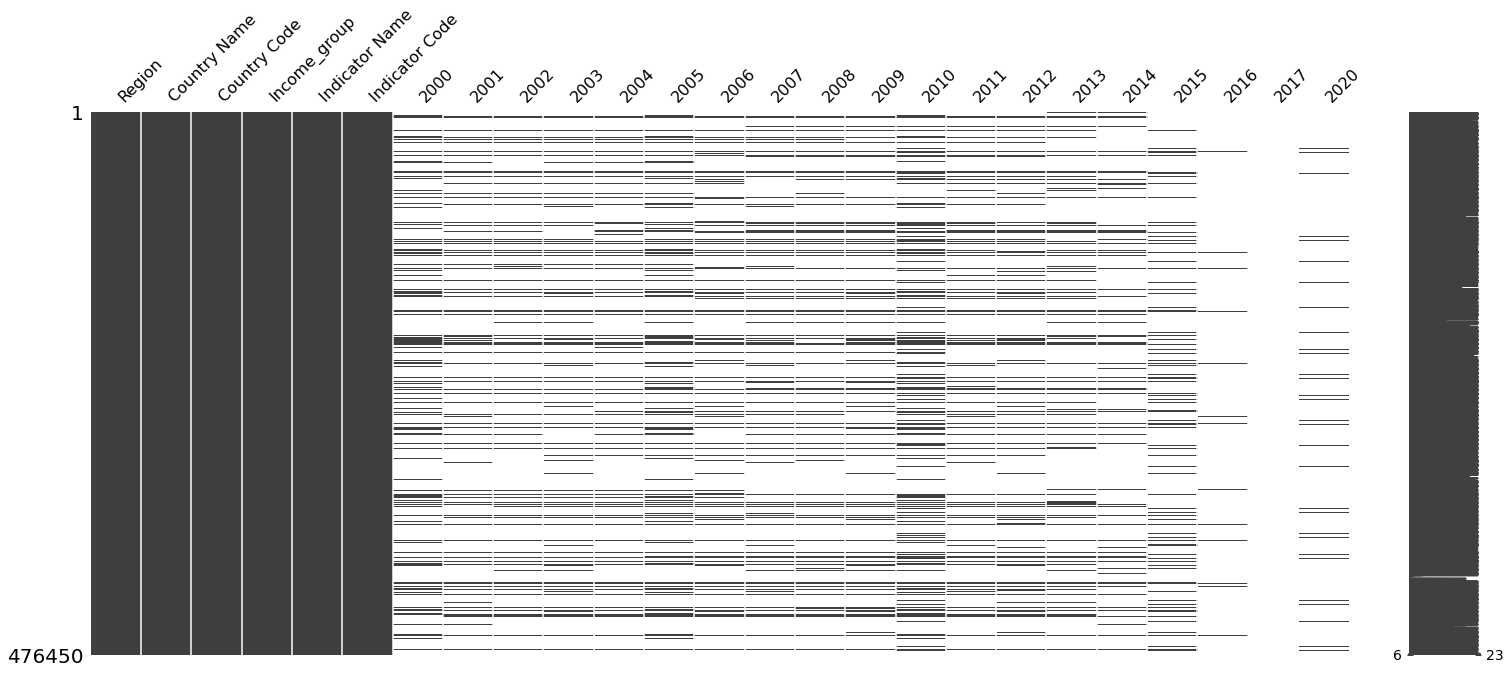

In [16]:
import missingno as msno
msno.matrix(data_r_income)

Not so much values after 2015

Interesting to keep '2000', '2005','2010','2015'

__Droping years "2016","2017","2020"__

In [17]:
data_r_income= data_r_income.drop(columns=['2016','2017','2020'])

### Selecte useful Indicators from "Indicator Code" feature

- Internet
- Education
- Population
- Economy

### INTERNET

- Internet users (per 100 people)(IT.NET.USER.P2)
- Personal computers (per 100 people)(IT.CMP.PCMP.P2)



In [18]:
data_r_internet = data_r_income.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")|
                                                (data_r_income['Indicator Code'] == "IT.CMP.PCMP.P2")] 
data_r_internet.shape

(260, 22)

In [19]:
data_r_internet.groupby('Indicator Name').count()

,Region,Country Name,Country Code,Income_group,Indicator Code,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),130,130,130,130,130,117,115,117,114,117,...,120,121,121,120,120,121,119,120,120,120
Personal computers (per 100 people),130,130,130,130,130,95,107,107,104,103,...,65,31,18,1,0,0,0,0,0,0


We almost have no data for PC, so we remove it.

__Just looking for the countries with Internet access__

In [20]:
data_r_internet = data_r_internet.loc[(data_r_income['Indicator Code'] == "IT.NET.USER.P2")] 
data_r_internet= data_r_internet.rename({"Country Code": "Country Code","Internet_PC": "Internet" },axis=1)

data_r_internet.head()

,Region,Country Name,Country Code,Income_group,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
96665,Europe & Central Asia,Albania,ALB,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,...,9.609991,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933
100330,Middle East & North Africa,Algeria,DZA,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,...,7.375985,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000
103995,East Asia & Pacific,American Samoa,ASM,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107660,Europe & Central Asia,Andorra,AND,High income: nonOECD,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,...,48.936847,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000
111325,Sub-Saharan Africa,Angola,AGO,Upper middle income,Internet users (per 100 people),IT.NET.USER.P2,0.105046,0.136014,0.270377,0.370682,...,1.500000,1.700000,1.90,2.30,2.8,3.1,6.500000,8.9,10.2,12.400000


In [21]:
data_r_internet.shape

(130, 22)

### Population

- Population, total(SP.POP.TOTL)
- Population, ages 15-24, total(SP.POP.1524.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)
- Population, ages 15-64, total(SP.POP.1564.TO)

In [22]:
codes_to_keep = ['SP.POP.TOTL', 
                 'SP.POP.1524.TO.UN',
                 'SP.POP.1564.TO',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]


In [23]:
data_r_pop.shape

(520, 22)

In [24]:
data_r_pop.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SP.POP.1524.TO.UN,130,130,130,130,130,108,109,110,110,109,...,105,100,100,100,100,100,100,100,100,100
SP.POP.1564.TO,130,130,130,130,130,111,111,111,111,111,...,111,111,111,111,111,111,111,111,110,110
SP.POP.TOTL,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,127,127
SP.TER.TOTL.IN,130,130,130,130,130,109,110,110,110,110,...,109,109,109,110,107,101,98,95,110,84


In [25]:
codes_to_keep = ['SP.POP.1564.TO',
                 'SP.TER.TOTL.IN']
data_r_pop = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Education

- Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Enrolment in tertiary education, all programmes, both sexes (number)(SE.TER.ENRL)

In [26]:
codes_to_keep = ['BAR.TER.CMPT.15UP.ZS', 
                 'SE.TER.ENRL']
data_r_edu = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [27]:
data_r_edu.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.TER.CMPT.15UP.ZS,130,130,130,130,130,86,0,0,0,0,...,0,0,0,0,86,0,0,0,0,0
SE.TER.ENRL,130,130,130,130,130,76,77,83,86,81,...,81,80,85,80,83,82,87,85,81,74


In [28]:
pivot_edu = pd.pivot_table(data_r_edu, values=['2010'], 
                                index=['Country Name'] ,columns=['Indicator Code'])          
                            
pivot_edu

2010            
Indicator Code       BAR.TER.CMPT.15UP.ZS SE.TER.ENRL
Country Name                                         
Albania                              0.93    122326.0
Algeria                              6.66   1144271.0
Antigua and Barbuda                   NaN      1170.0
Argentina                            2.87   2520985.0
Aruba                                 NaN      2330.0
...                                   ...         ...
United Arab Emirates                 8.54    101906.0
United Kingdom                      15.31   2479197.0
United States                       26.76  20427708.0
Uruguay                              3.50    163156.0
Venezuela, RB                        2.96         NaN

[101 rows x 2 columns]

### Expenditures on education

- Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- GDP per capita, PPP (current international dollar)(NY.GDP.PCAP.PP.CD)
- Expenditure on education as % of total government expenditure (%)(SE.XPD.TOTL.GB.ZS)
- 	GNI per capita based on purchasing power parity (PPP).GNI per capita, PPP (current international dollar)(NY.GNP.PCAP.PP.CD)

In [29]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD',
                'SE.XPD.TOTL.GB.ZS',
                'NY.GNP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

In [30]:
data_r_exp.groupby('Indicator Code').count()

,Region,Country Name,Country Code,Income_group,Indicator Name,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,,,,,,,,
NY.GDP.PCAP.PP.CD,130,130,130,130,130,109,110,110,110,110,...,110,110,110,110,110,112,109,109,107,106
NY.GNP.PCAP.PP.CD,130,130,130,130,130,103,106,107,107,108,...,108,109,109,109,109,109,108,108,106,105
SE.XPD.TOTL.GB.ZS,130,130,130,130,130,67,70,78,71,73,...,67,69,68,71,71,68,63,67,52,19
SE.XPD.TOTL.GD.ZS,130,130,130,130,130,72,73,81,74,77,...,71,73,72,74,73,70,64,69,53,22


In [31]:
codes_to_keep = ['SE.XPD.TOTL.GD.ZS', 
                 'NY.GDP.PCAP.PP.CD']
data_r_exp = data_r_income[data_r_income['Indicator Code'].isin(codes_to_keep)]

### Demographics

__Internet__

- Internet users (per 100 people)(IT.NET.USER.P2)

__Population__

- Population, ages 15-64, total(SP.POP.1564.TO.UN)   
- School age population, tertiary education, both sexes (number)(SP.TER.TOTL.IN)

__Education__

- Barro-Lee: Percentage of population age 15+ with tertiary schooling in 2010. Completed Tertiary(BAR.TER.CMPT.15UP.ZS)
- Enrolment in tertiary education, all programmes, both sexes in 2010 (number)(SE.TER.ENRL)

__Expenditures on education__
- Government expenditure on education as % of GDP (%)(SE.XPD.TOTL.GD.ZS)
- GDP per capita, PPP (current international dollar)(NY.GDP.PCAP.PP.CD)

__Looking for all the countries which have " Upper middle income and High income" and our selected indicators.__

In [32]:
data_r_income.shape

(476450, 22)

In [33]:
indicators_to_keep = ['IT.NET.USER.P2',
                      
                      'SP.POP.1564.TO', 
                       'SP.TER.TOTL.IN',
                      
                      'BAR.TER.CMPT.15UP.ZS',
                      'SE.TER.ENRL',
                       
                      'NY.GNP.PCAP.PP.CD', 
                      'SE.XPD.TOTL.GB.ZS']
data_filter = data_r_income[data_r_income['Indicator Code'].isin(indicators_to_keep)]
data_filter.shape

(910, 22)

<AxesSubplot:>

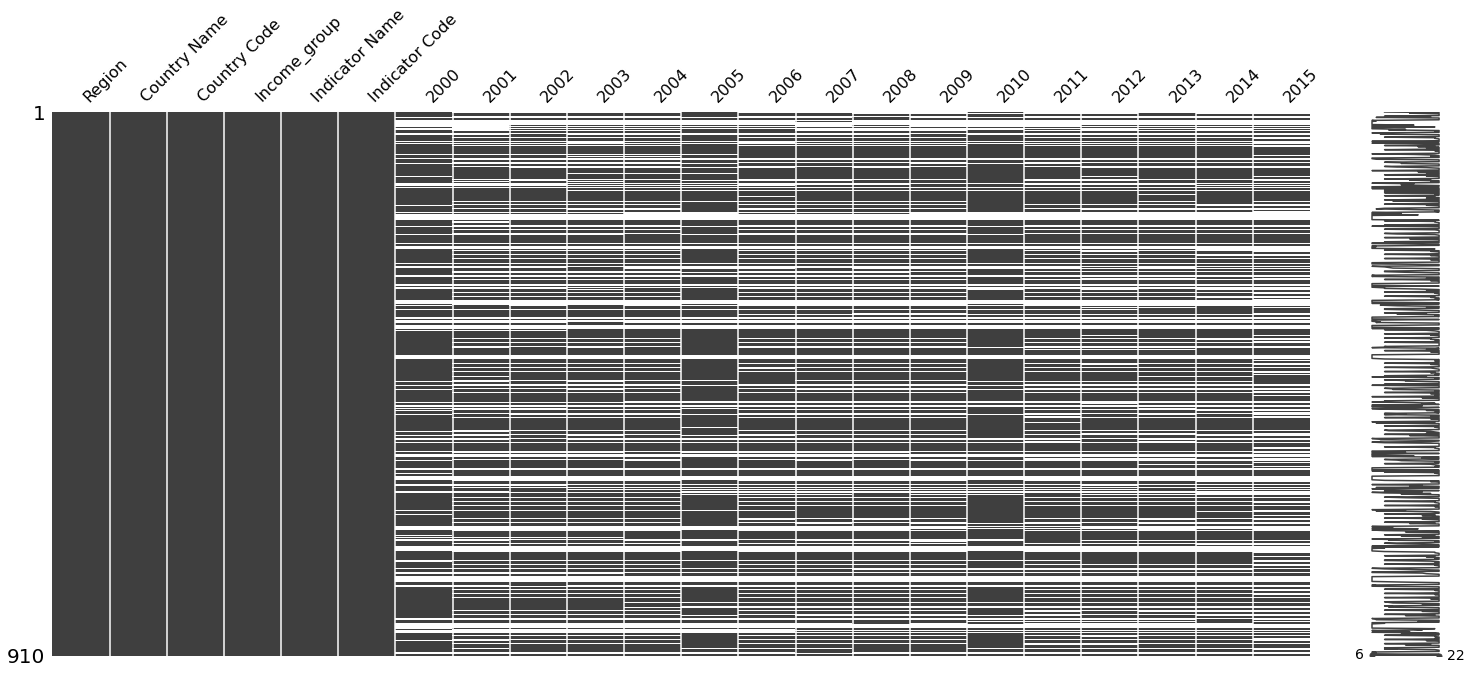

In [34]:
msno.matrix(data_filter)

In [35]:
data_filter_2010 = data_filter.pivot_table(index=['Country Name'], 
                                                  columns=['Indicator Code'], 
                                                  values= '2010')
data_filter_2010.head()

Indicator Code,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
Country Name,,,,,,,
Albania,0.93,45.0,9550.0,122326.0,NaN,1947666.0,274639.0
Algeria,6.66,12.5,12580.0,1144271.0,NaN,24315242.0,3835387.0
Andorra,NaN,81.0,NaN,NaN,NaN,NaN,NaN
Angola,NaN,2.8,5210.0,NaN,8.68477,11771088.0,1923759.0
Antigua and Barbuda,NaN,47.0,18310.0,1170.0,NaN,63172.0,7208.0


In [36]:
pivot_2010= pd.merge(data_filter_2010,countries_income, left_on='Country Name',right_on='Name')


In [37]:
pivot_2010 = pivot_2010.sort_values(by=['Region'])

'East Asia & Pacific', 'Europe & Central Asia',
     'Latin America & Caribbean', 'Middle East & North Africa',
  'North America', 'South Asia', 'Sub-Saharan Africa'

In [38]:
country_to_keep = ['East Asia & Pacific', 'Europe & Central Asia', 
                   'Latin America & Caribbean', 'Middle East & North Africa', 
                   'North America', 'Sub-Saharan Africa']
pivot_plus_country = pivot_2010[pivot_2010['Region'].isin(country_to_keep)]
pivot_plus_country.head()

,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN,Country Code,Name,Region,Income_group
77,15.50,80.46,29710.0,266232.0,16.930861,2891030.0,322637.0,NZL,New Zealand,East Asia & Pacific,High income: OECD
69,NaN,7.00,4120.0,NaN,NaN,NaN,3949.0,MHL,Marshall Islands,East Asia & Pacific,Upper middle income
76,NaN,42.00,NaN,NaN,NaN,166444.0,NaN,NCL,New Caledonia,East Asia & Pacific,High income: nonOECD
46,NaN,54.04,NaN,NaN,NaN,104011.0,NaN,GUM,Guam,East Asia & Pacific,High income: nonOECD
66,5.81,56.30,20020.0,1061421.0,18.406231,18872495.0,2858308.0,MYS,Malaysia,East Asia & Pacific,Upper middle income


In [39]:
features_with_na=[features for features in pivot_plus_country.columns if pivot_plus_country[features].isnull().sum()>1]

## print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(pivot_plus_country[feature].isnull().mean(),2),  ' % missing values')
 

BAR.TER.CMPT.15UP.ZS 0.3  % missing values
IT.NET.USER.P2 0.04  % missing values
NY.GNP.PCAP.PP.CD 0.11  % missing values
SE.TER.ENRL 0.31  % missing values
SE.XPD.TOTL.GB.ZS 0.4  % missing values
SP.POP.1564.TO 0.11  % missing values
SP.TER.TOTL.IN 0.14  % missing values


In [40]:
pivot_plus_country.describe()

,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
count,80.00000,110.000000,101.000000,7.900000e+01,68.000000,1.010000e+02,9.800000e+01
mean,11.01925,50.472962,25596.336634,1.328841e+06,13.782487,2.285708e+07,2.661622e+06
std,6.58490,23.806734,19217.437952,4.192664e+06,4.146906,1.007652e+08,1.324772e+07
min,0.32000,2.500000,4120.000000,5.000000e+00,5.534290,5.913000e+04,1.041000e+03
25%,6.20500,33.850000,12320.000000,7.470750e+04,10.726963,9.516080e+05,6.940650e+04
50%,10.49500,47.225000,18670.000000,2.486390e+05,13.192780,3.738501e+06,3.696195e+05
75%,15.24250,69.637500,36080.000000,9.456050e+05,15.723107,1.160611e+07,1.459911e+06
max,29.71000,93.390000,109930.000000,3.104674e+07,26.193251,9.865779e+08,1.296427e+08


In [41]:
pivot_plus_country.columns

Index(['BAR.TER.CMPT.15UP.ZS', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD',
       'SE.TER.ENRL', 'SE.XPD.TOTL.GB.ZS', 'SP.POP.1564.TO', 'SP.TER.TOTL.IN',
       'Country Code', 'Name', 'Region', 'Income_group'],
      dtype='object')

In [42]:
pivot_plus_country = pivot_plus_country.round({'IT.NET.USER.P2': 2,'BAR.TER.CMPT.15UP.ZS':2 ,'SE.XPD.TOTL.GB.ZS': 2,
                                              'NY.GNP.PCAP.PP.CD':2,'SE.TER.ENRL':2,
                                              'SP.POP.1564.TO':2 , 'SP.TER.TOTL.IN':2})

__Filling Missing Values__

In [43]:
pivot_plus_country['BAR.TER.CMPT.15UP.ZS']= pivot_plus_country['BAR.TER.CMPT.15UP.ZS'].fillna(pivot_plus_country['BAR.TER.CMPT.15UP.ZS'].mean())

pivot_plus_country['IT.NET.USER.P2']= pivot_plus_country['IT.NET.USER.P2'].fillna(pivot_plus_country['IT.NET.USER.P2'].median())

pivot_plus_country['NY.GNP.PCAP.PP.CD']= pivot_plus_country['NY.GNP.PCAP.PP.CD'].fillna(pivot_plus_country['NY.GNP.PCAP.PP.CD'].median())

pivot_plus_country['SE.TER.ENRL']= pivot_plus_country['SE.TER.ENRL'].fillna(pivot_plus_country['SE.TER.ENRL'].median())

pivot_plus_country['SE.XPD.TOTL.GB.ZS']= pivot_plus_country['SE.XPD.TOTL.GB.ZS'].fillna(pivot_plus_country['SE.XPD.TOTL.GB.ZS'].median())

pivot_plus_country['SP.POP.1564.TO']= pivot_plus_country['SP.POP.1564.TO'].fillna(pivot_plus_country['SP.POP.1564.TO'].median())

pivot_plus_country['SP.TER.TOTL.IN']= pivot_plus_country['SP.TER.TOTL.IN'].fillna(pivot_plus_country['SP.TER.TOTL.IN'].median())

In [44]:
pivot_plus_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 77 to 91
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BAR.TER.CMPT.15UP.ZS  114 non-null    float64
 1   IT.NET.USER.P2        114 non-null    float64
 2   NY.GNP.PCAP.PP.CD     114 non-null    float64
 3   SE.TER.ENRL           114 non-null    float64
 4   SE.XPD.TOTL.GB.ZS     114 non-null    float64
 5   SP.POP.1564.TO        114 non-null    float64
 6   SP.TER.TOTL.IN        114 non-null    float64
 7   Country Code          114 non-null    object 
 8   Name                  114 non-null    object 
 9   Region                114 non-null    object 
 10  Income_group          114 non-null    object 
dtypes: float64(7), object(4)
memory usage: 10.7+ KB


In [45]:
pivot_plus_country.describe()

,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
count,114.000000,114.000000,114.000000,1.140000e+02,114.000000,1.140000e+02,1.140000e+02
mean,11.019250,50.359035,24806.491228,9.972004e+05,13.545088,2.067690e+07,2.339938e+06
std,5.505839,23.389276,18212.981949,3.519124e+06,3.206232,9.498822e+07,1.230007e+07
min,0.320000,2.500000,4120.000000,5.000000e+00,5.530000,5.913000e+04,1.041000e+03
25%,7.632500,34.417500,12615.000000,1.675488e+05,12.877500,1.314254e+06,1.041142e+05
50%,11.019250,47.225000,18670.000000,2.486390e+05,13.195000,3.738501e+06,3.696195e+05
75%,13.222500,68.955000,32275.000000,4.252530e+05,14.105000,9.062192e+06,9.838028e+05
max,29.710000,93.390000,109930.000000,3.104674e+07,26.190000,9.865779e+08,1.296427e+08


In [46]:
pivot_plus_country.shape

(114, 11)

### Ckeck outliers

In [47]:
from collections import Counter

In [48]:
# calculate interquartile range
Q1 = pivot_plus_country.quantile(q=.25)
Q3 = pivot_plus_country.quantile(q=.75)
IQR=Q3-Q1

data_clean1 = pivot_plus_country[~((pivot_plus_country < (Q1-1.5*IQR)) | (pivot_plus_country > (Q3+1.5*IQR))).any(axis=1)]
data_clean1.shape

(61, 11)

Mean value of shortlisted indicators per Regio

In [49]:
pivot_plus_country.groupby('Region').mean()

,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
Region,,,,,,,
East Asia & Pacific,11.960912,47.419706,25768.823529,2.494739e+06,14.519706,6.914340e+07,8.700782e+06
Europe & Central Asia,12.665817,63.402667,27171.555556,5.539678e+05,11.895556,9.999273e+06,9.852762e+05
Latin America & Caribbean,9.240435,41.308704,14583.333333,7.285084e+05,15.242778,1.297505e+07,1.069768e+06
Middle East & North Africa,9.187036,42.672143,36575.714286,3.161970e+05,13.694643,6.960941e+06,9.688242e+05
North America,20.149750,78.733333,52340.000000,6.892539e+06,12.776667,7.804602e+07,7.999057e+06
Sub-Saharan Africa,5.542219,16.591250,13040.000000,1.959534e+05,15.049375,6.230423e+06,1.007220e+06


In [50]:
data_clean1.groupby('Region').mean()

,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
Region,,,,,,,
East Asia & Pacific,9.506937,32.533125,11082.500000,248639.000000,13.195000,1.537204e+06,150343.687500
Europe & Central Asia,13.357667,64.114375,26698.750000,248996.333333,13.243958,3.742320e+06,393028.062500
Latin America & Caribbean,9.246029,42.823235,15621.176471,212155.764706,13.516765,2.780505e+06,294185.823529
Middle East & North Africa,10.541321,47.218571,32444.285714,185056.142857,13.599286,3.385269e+06,352519.214286
Sub-Saharan Africa,6.447700,18.866000,15922.000000,164342.000000,13.497000,7.458900e+05,108161.600000


### Duplicated checking by the name of countries

In [51]:
data_clean1.duplicated(subset=['Name']).sum()

0

__Comparing the features bafore and after removing outliers__

1) with outliers

2) without outliers

Text(0.5, 0.98, 'Internet users in 2015 (per 100 people)')

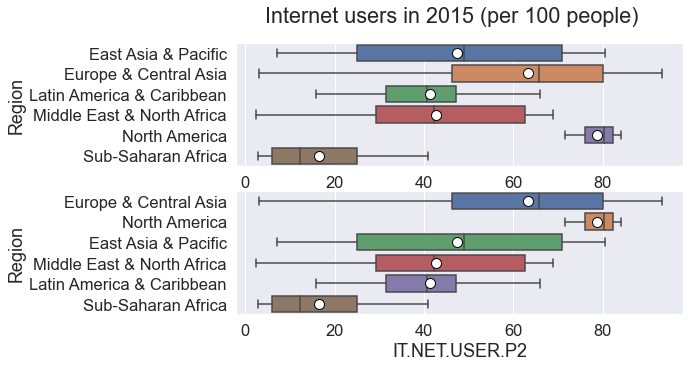

In [70]:
from pylab import rcParams
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 8,5
plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="IT.NET.USER.P2", data=pivot_plus_country,showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="IT.NET.USER.P2", data=data_clean1,showmeans=True,
                meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
plt.suptitle("Internet users in 2015 (per 100 people)")

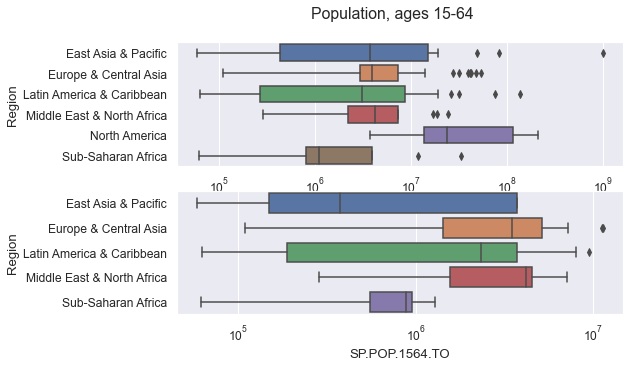

In [53]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="SP.POP.1564.TO", data=pivot_plus_country)
plt.xscale('log')
plt.suptitle("Population, ages 15-64")

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SP.POP.1564.TO", data=data_clean1)
plt.xscale('log')

Text(0.5, 0.98, '% population age 15+ with tertiary schooling')

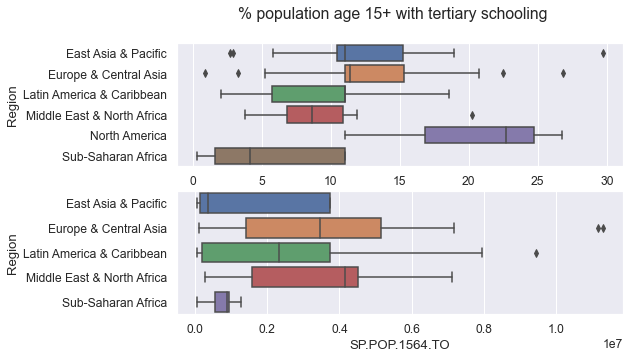

In [54]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="BAR.TER.CMPT.15UP.ZS", data=pivot_plus_country)

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SP.POP.1564.TO", data=data_clean1)
plt.suptitle("% population age 15+ with tertiary schooling")

Text(0.5, 0.98, 'GNI per capita based on purchasing power parity')

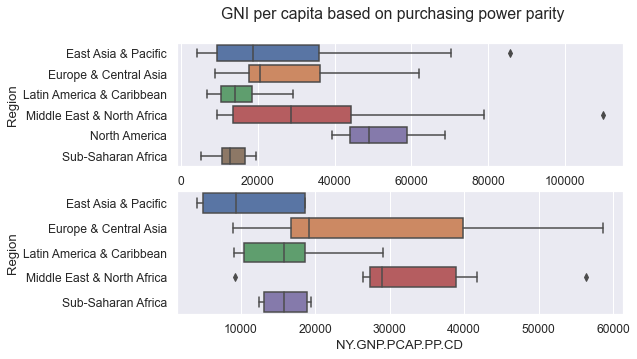

In [55]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="NY.GNP.PCAP.PP.CD", data=pivot_plus_country)

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="NY.GNP.PCAP.PP.CD", data=data_clean1)
plt.suptitle("GNI per capita based on purchasing power parity")

Text(0.5, 0.98, 'Enrolment in tertiary education')

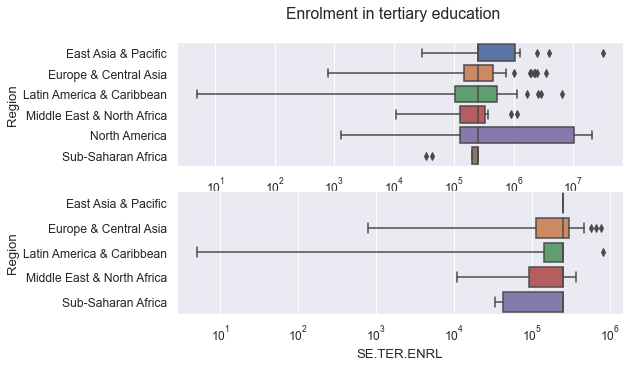

In [56]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="SE.TER.ENRL", data=pivot_plus_country)
plt.xscale('log')
plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SE.TER.ENRL", data=data_clean1)
plt.xscale('log')
plt.suptitle("Enrolment in tertiary education")

Text(0.5, 0.98, 'Expenditure on education as % of total government expenditure')

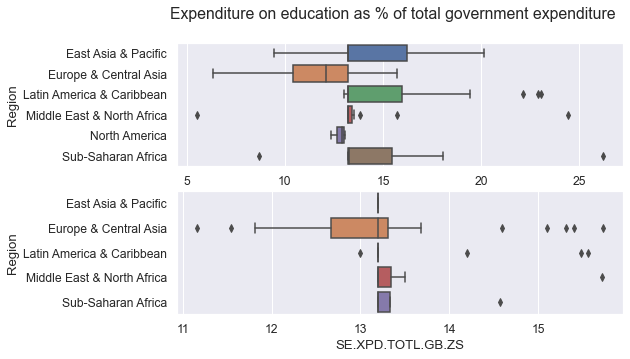

In [57]:
sns.set(font_scale=1.1)
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
ax = sns.boxplot(y="Region", x="SE.XPD.TOTL.GB.ZS", data=pivot_plus_country)

plt.subplot(2,1,2)
ax = sns.boxplot(y="Region", x="SE.XPD.TOTL.GB.ZS", data=data_clean1)
plt.suptitle("Expenditure on education as % of total government expenditure")

In [58]:
pivot_plus_country.columns

Index(['BAR.TER.CMPT.15UP.ZS', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD',
       'SE.TER.ENRL', 'SE.XPD.TOTL.GB.ZS', 'SP.POP.1564.TO', 'SP.TER.TOTL.IN',
       'Country Code', 'Name', 'Region', 'Income_group'],
      dtype='object')

Text(0.5, 1.0, 'Expenditure on education as % of total government expenditure')

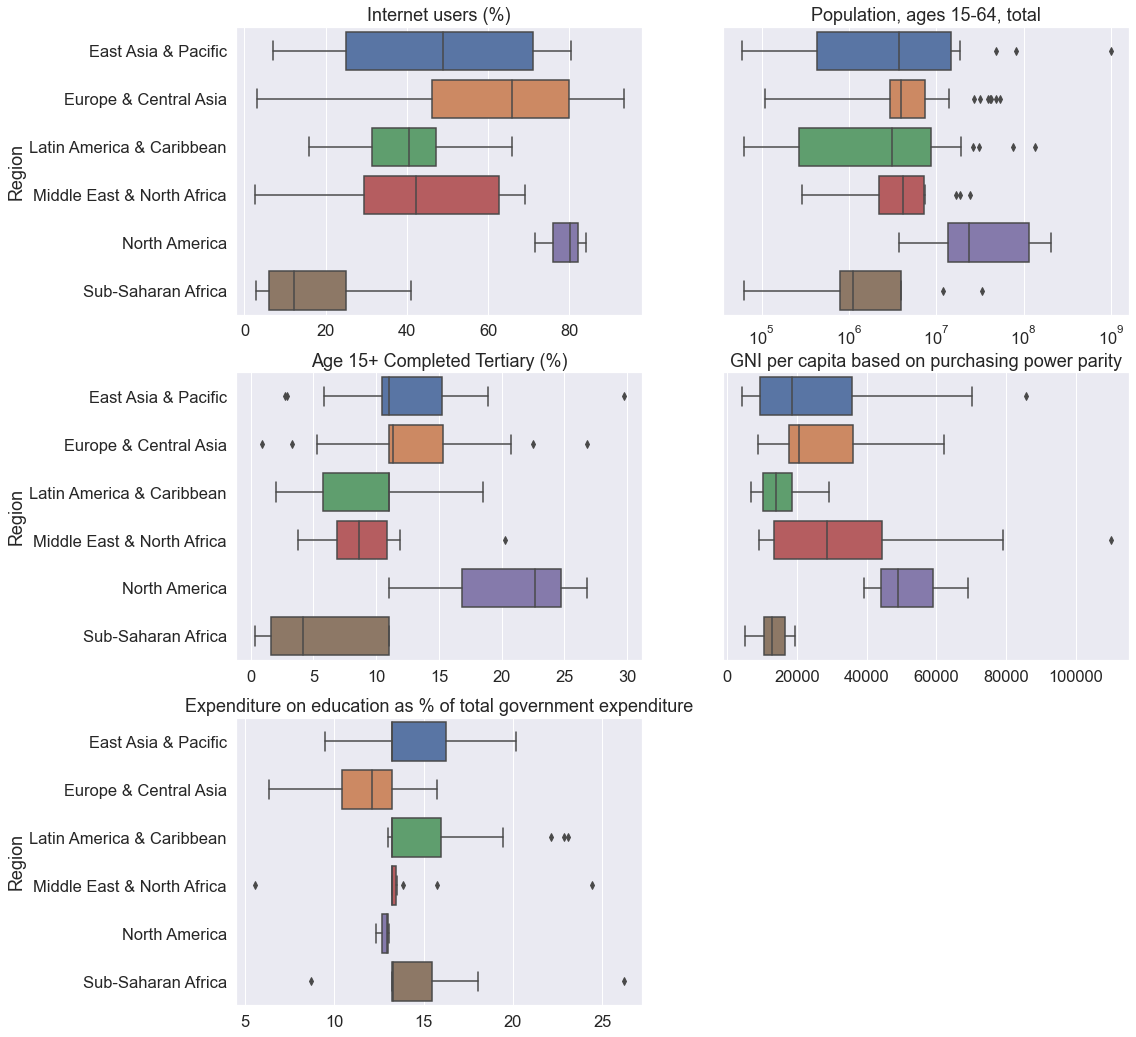

In [59]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.boxplot(data=pivot_plus_country, x="IT.NET.USER.P2", y="Region")
plt.xlabel("")
plt.title("Internet users (%)")

plt.subplot(3,2,2)
sns.boxplot(data=pivot_plus_country, x="SP.POP.1564.TO", y="Region")
plt.xscale('log')
plt.xlabel("")
plt.title("Population, ages 15-64, total")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(3,2,3)
sns.boxplot(data=pivot_plus_country, x="BAR.TER.CMPT.15UP.ZS", y="Region")
plt.xlabel("")
plt.title("Age 15+ Completed Tertiary (%)")

plt.subplot(3,2,4)
sns.boxplot(data=pivot_plus_country, x="NY.GNP.PCAP.PP.CD", y="Region")
plt.xlabel("")
plt.title("GNI per capita based on purchasing power parity")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(3,2,5)
sns.boxplot(data=pivot_plus_country, x="SE.XPD.TOTL.GB.ZS", y="Region")
plt.xlabel("")
plt.title("Expenditure on education as % of total government expenditure")

In [60]:
round(0.930000)

1

In [61]:
data_clean1.describe()


,BAR.TER.CMPT.15UP.ZS,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.TER.ENRL,SE.XPD.TOTL.GB.ZS,SP.POP.1564.TO,SP.TER.TOTL.IN
count,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,10.817209,48.391230,21339.508197,224406.147541,13.375082,2.898495e+06,3.056561e+05
std,4.477073,24.266041,13089.083801,166562.957395,0.940946,2.773626e+06,3.346971e+05
min,0.930000,3.000000,4120.000000,5.000000,11.160000,5.913000e+04,1.041000e+03
25%,11.019250,31.590000,12500.000000,112567.000000,13.195000,5.555170e+05,4.297800e+04
50%,11.019250,47.000000,18670.000000,248639.000000,13.195000,2.335182e+06,2.746390e+05
75%,12.420000,66.000000,27530.000000,248639.000000,13.195000,3.738501e+06,3.696195e+05
max,20.750000,93.390000,58620.000000,800873.000000,15.730000,1.128452e+07,1.643373e+06


### Corrolation between selected indicatores

In [62]:
num_var = data_clean1.dtypes[pivot_plus_country.dtypes.values != 'object'].index


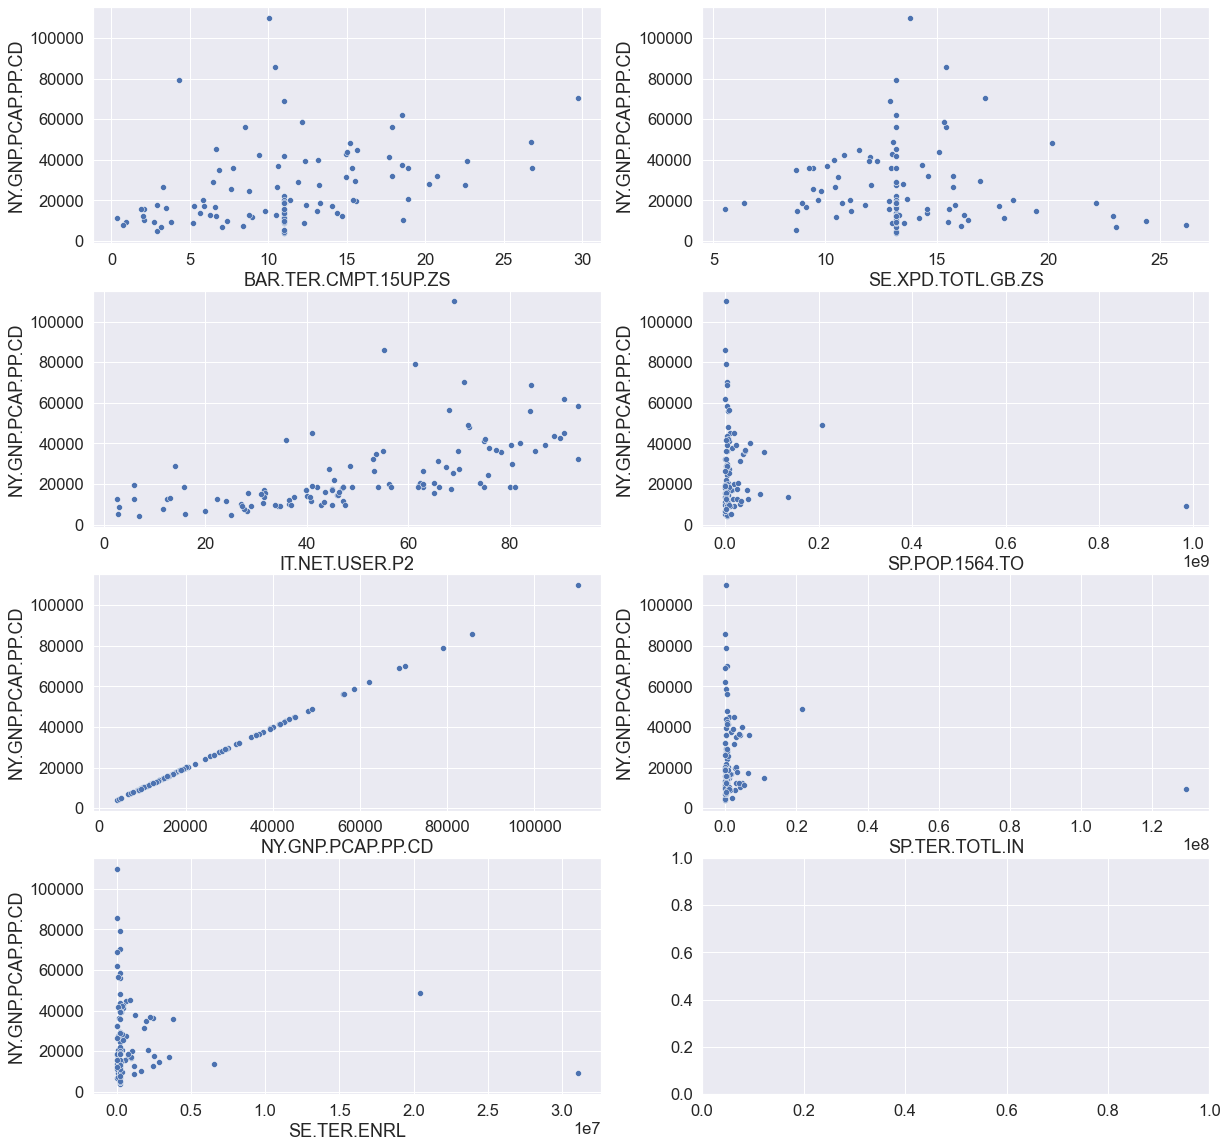

In [63]:
f, axes = plt.subplots(4,2 , figsize=(20, 20), sharex=False)
for i, feature in enumerate(num_var):
    sns.scatterplot(data=pivot_plus_country, x = feature, y= "NY.GNP.PCAP.PP.CD",ax=axes[i%4, i//4])

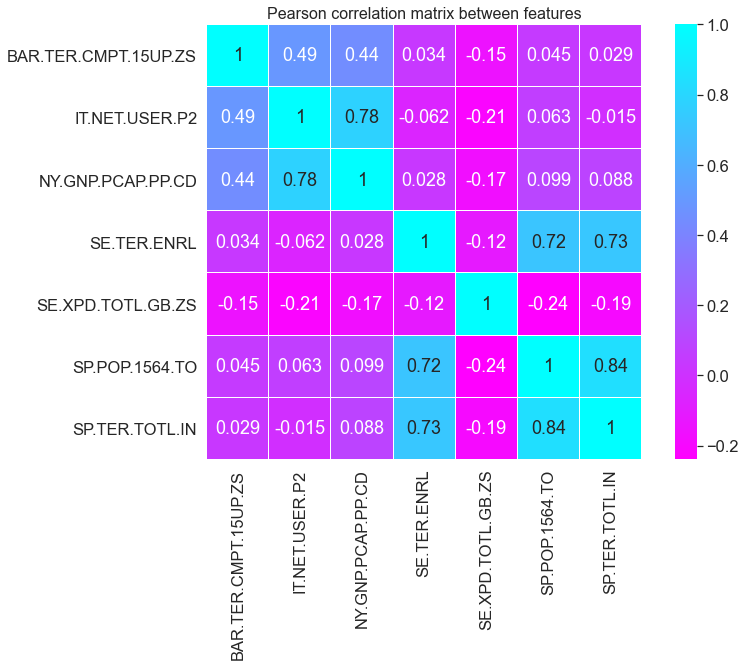

In [68]:
#mask = np.zeros_like(pivot_plus_country.corr(method = 'spearman'))
#mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
plt.title('Pearson correlation matrix between features', y=1, size=16)

sns.heatmap(data_clean1.corr(method = 'spearman'), linewidths=0.1, vmax=1.0,
            square=True, cmap="cool_r", linecolor='white', annot=True)
plt.show()

__Just keeping 3 indicatores with hight corrolation__



- Internet users 
- GNI per capita
- Age 15+ Completed Tertiary

ValueError: min() arg is an empty sequence

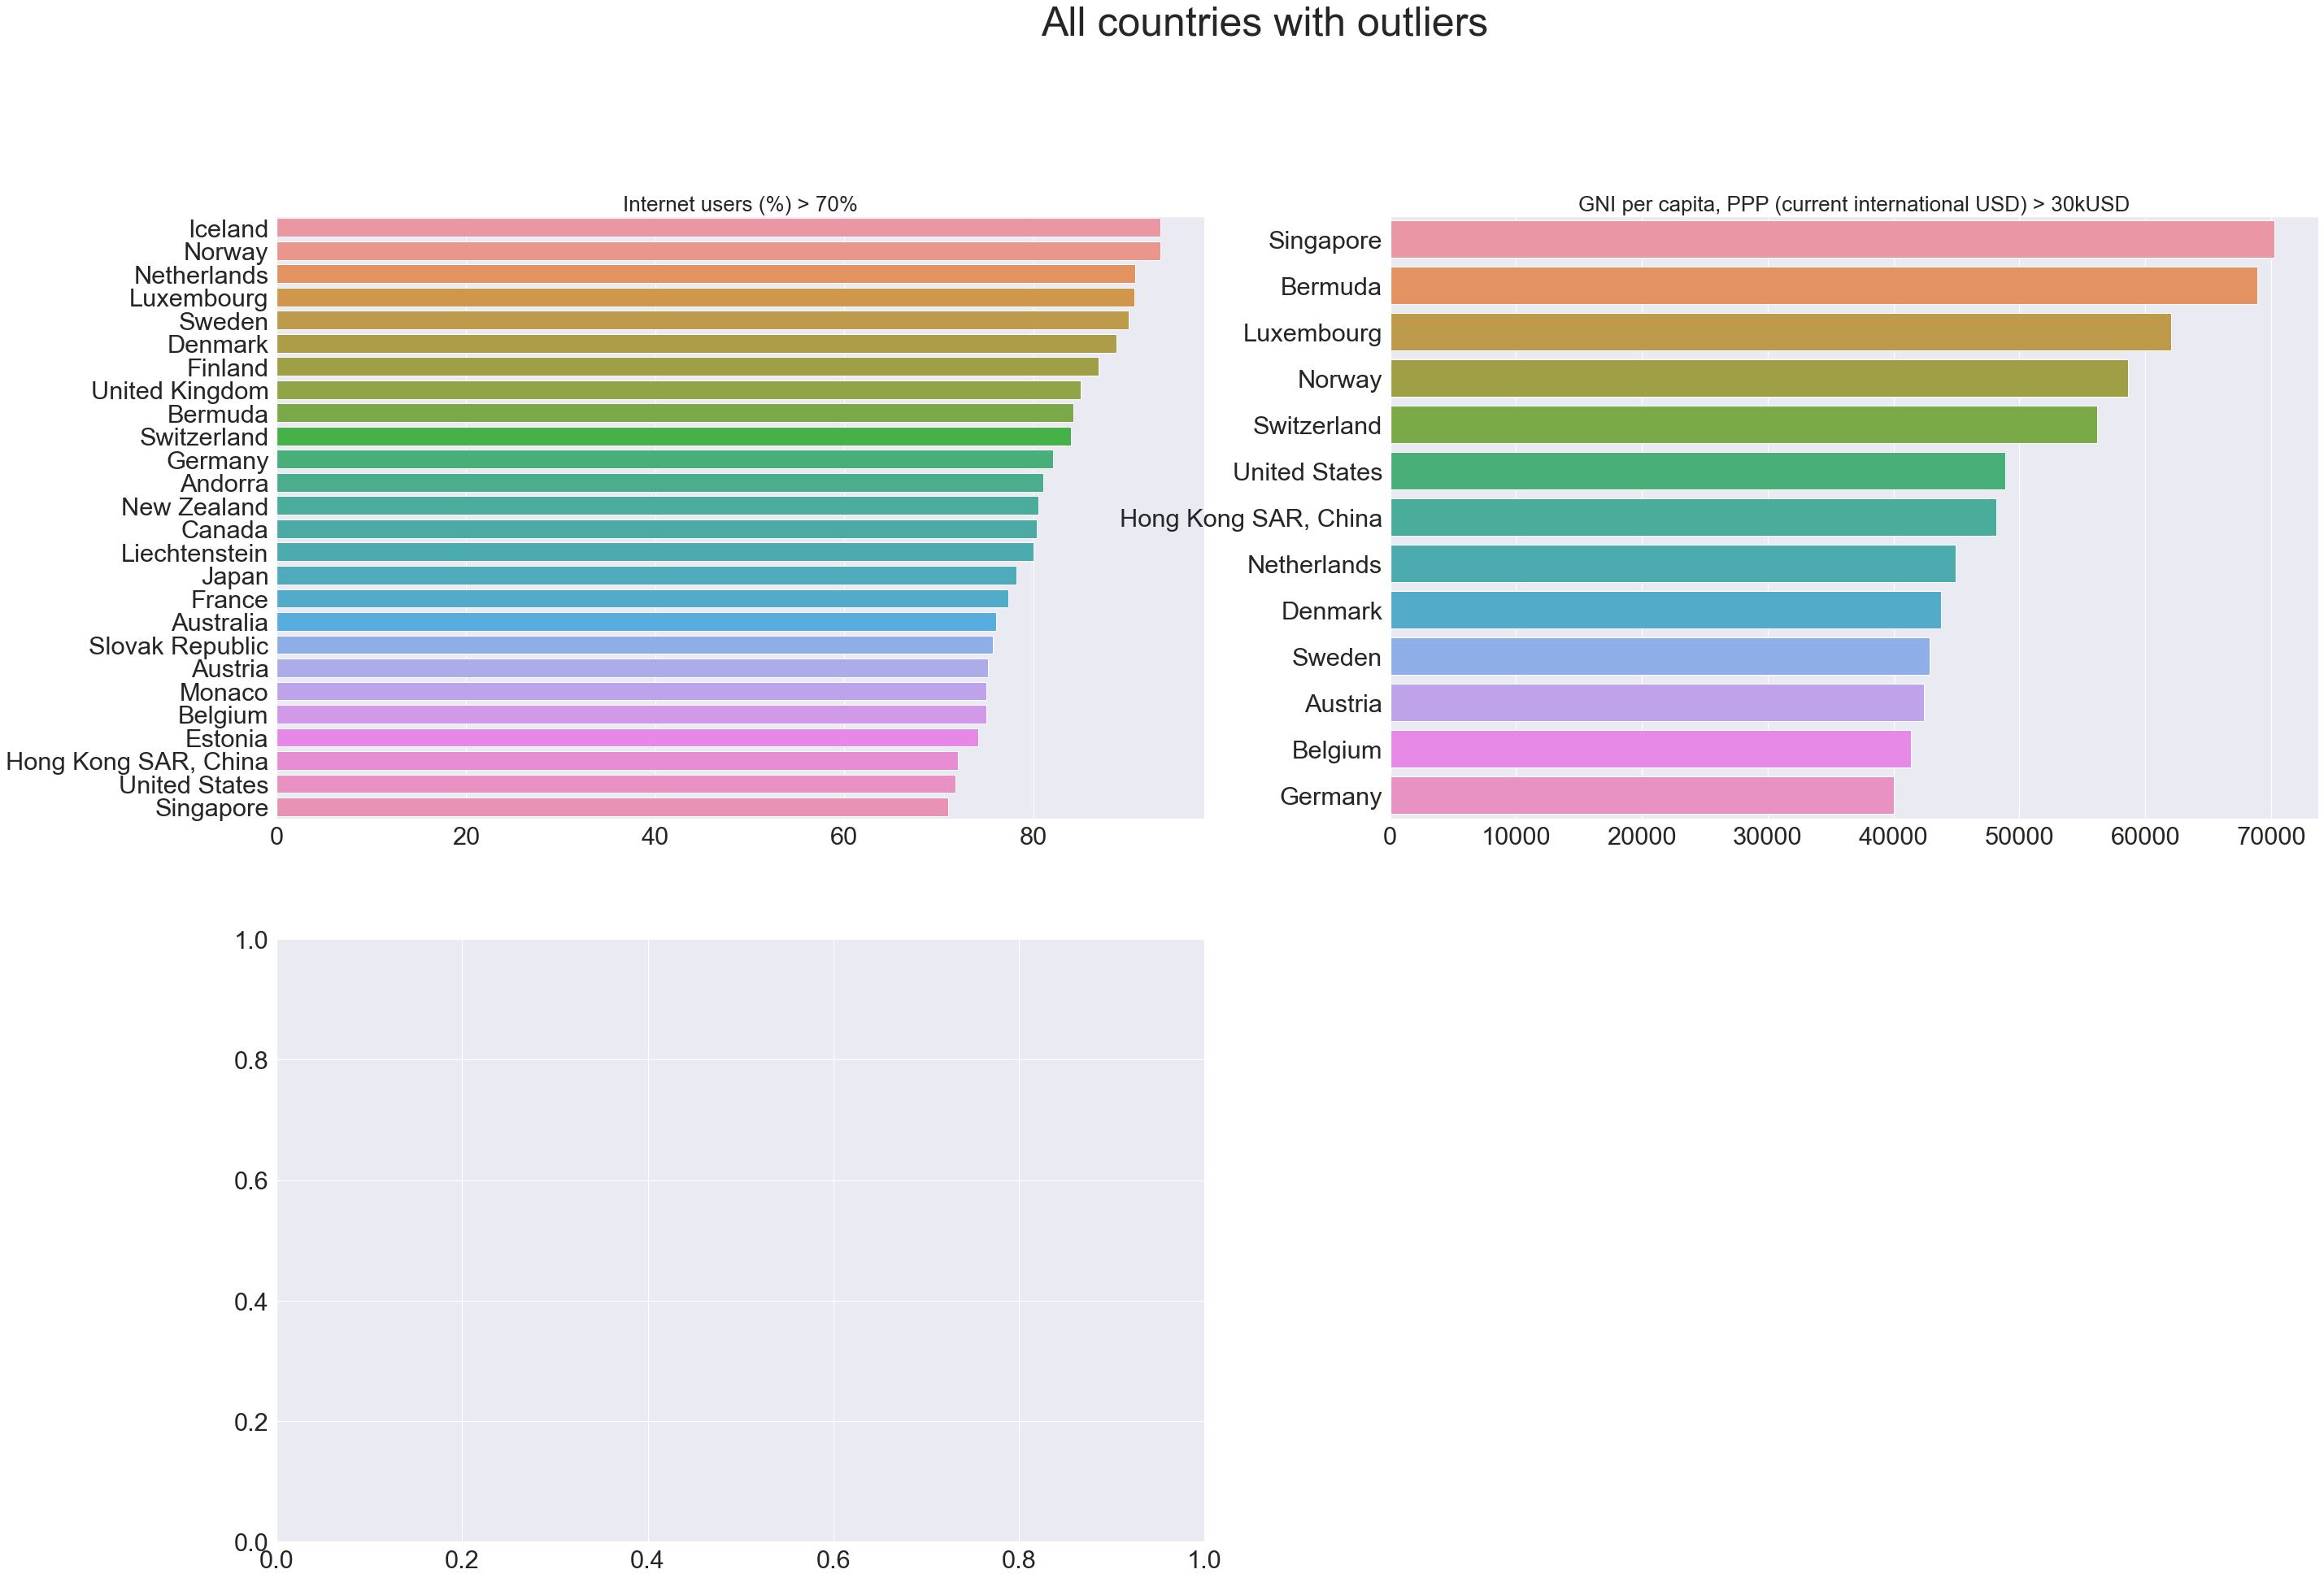

In [76]:
#country_to_keep = ['Europe & Central Asia']
#pivot_EuropeCenAsia = pivot_plus_country[pivot_plus_country['Region'].isin(country_to_keep)]

data_sort = pivot_plus_country.sort_values(by=['IT.NET.USER.P2'], ascending=False)
pivot_world_INT = data_sort[(data_sort['IT.NET.USER.P2'] > 70)]

pivot_world_GNI = pivot_world_INT.sort_values(by=['NY.GNP.PCAP.PP.CD'], ascending=False)
pivot_world_GNI = pivot_world_GNI[(pivot_world_GNI['NY.GNP.PCAP.PP.CD'] > 40000)]

pivot_world_EDU = pivot_world_GNI.sort_values(by=['BAR.TER.CMPT.15UP.ZS'], ascending=False)
pivot_world_EDU = pivot_world_EDU[(pivot_world_EDU['BAR.TER.CMPT.15UP.ZS'] > 40)]

sns.set(font_scale=2.8)
plt.figure(figsize=(45,30))
plt.suptitle('All countries with outliers', size=50, y=1)

plt.subplot(2,2,1)
sns.barplot(data=pivot_world_INT, y="Name", x="IT.NET.USER.P2")
plt.xlabel('')
plt.ylabel('')
plt.title("Internet users (%) > 70%", fontsize=26)

plt.subplot(2,2,2)
sns.barplot(data=pivot_world_GNI, y="Name", x="NY.GNP.PCAP.PP.CD")
plt.xlabel('')
plt.ylabel('')
plt.title("GNI per capita, PPP (current international USD) > 30kUSD", fontsize=26)

plt.subplot(2,2,3)
sns.barplot(data=pivot_world_EDU, y="Name", x="BAR.TER.CMPT.15UP.ZS")
plt.xlabel('')
plt.ylabel('')
plt.title("Age 15+ Completed Tertiary (%) > 40%", fontsize=26)
plt.show()

ValueError: min() arg is an empty sequence

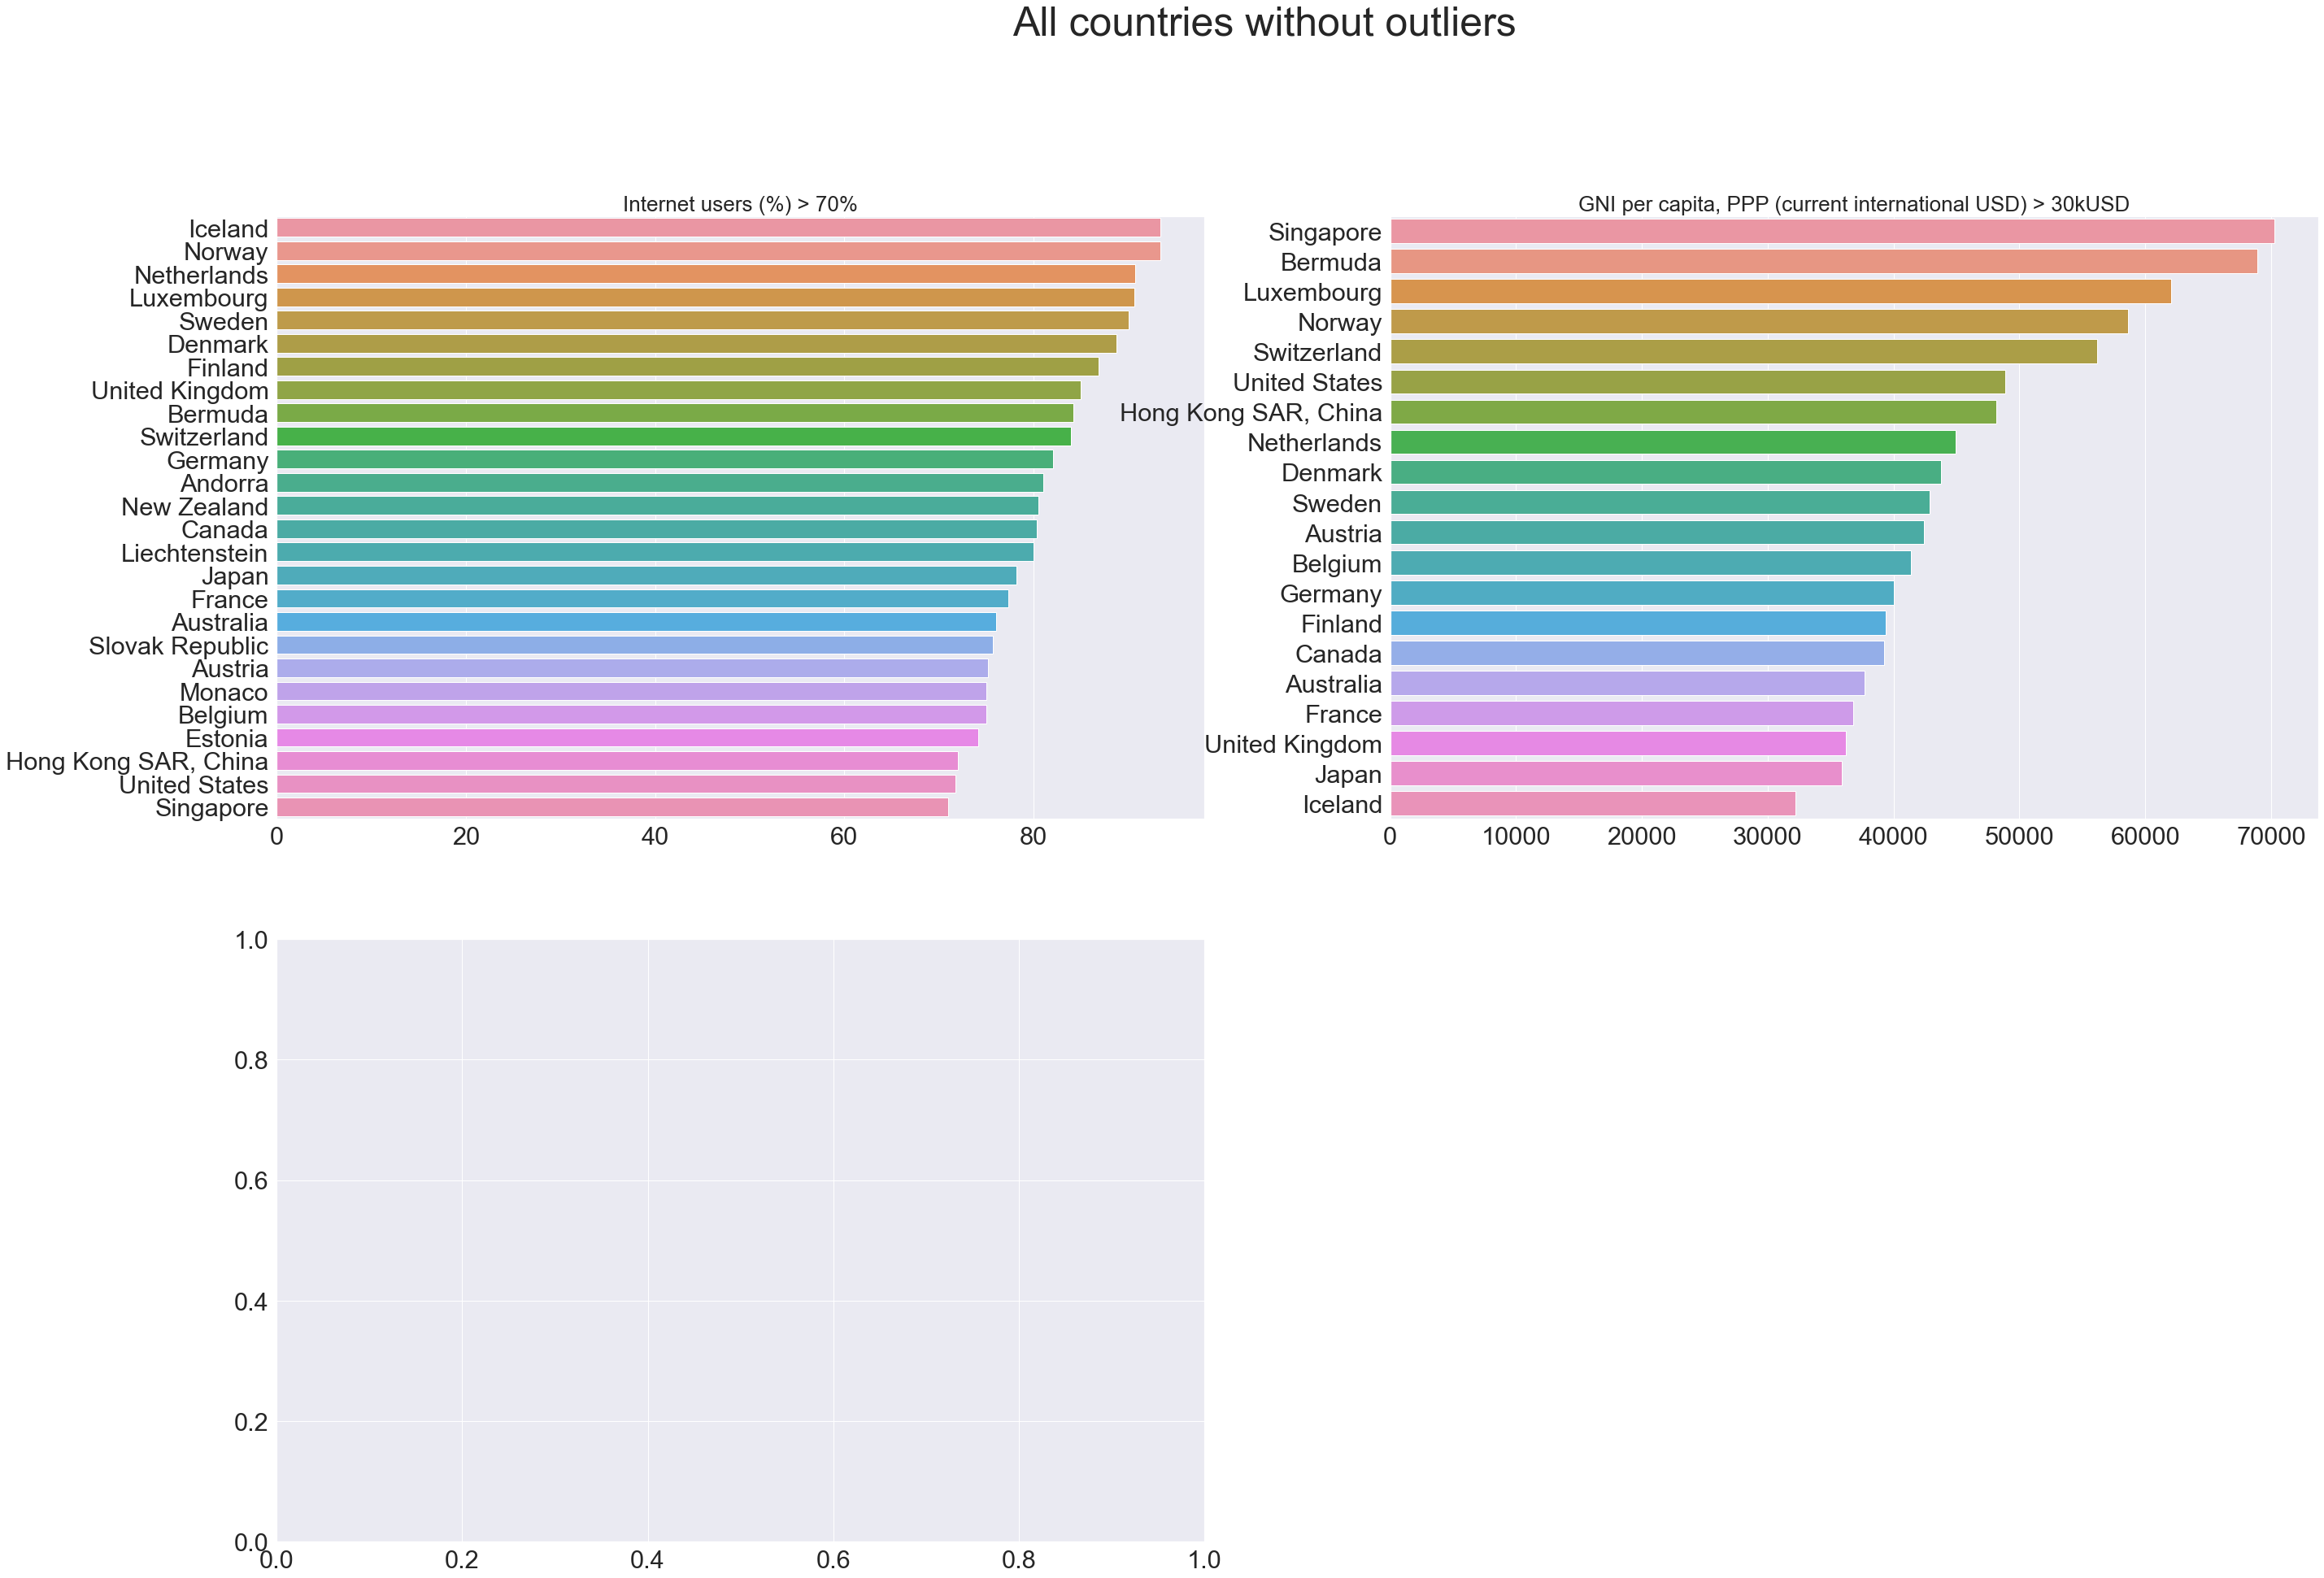

In [78]:
#country_to_keep = ['Europe & Central Asia']
#pivot_EuropeCenAsia = pivot_plus_country[pivot_plus_country['Region'].isin(country_to_keep)]

data_sort = data_clean1.sort_values(by=['IT.NET.USER.P2'], ascending=False)
pivot_world_INT = data_sort[(data_sort['IT.NET.USER.P2'] > 70)]

pivot_world_GNI = pivot_world_INT.sort_values(by=['NY.GNP.PCAP.PP.CD'], ascending=False)
pivot_world_GNI = pivot_world_GNI[(pivot_world_GNI['NY.GNP.PCAP.PP.CD'] > 30000)]

pivot_world_EDU = pivot_world_GNI.sort_values(by=['BAR.TER.CMPT.15UP.ZS'], ascending=False)
pivot_world_EDU = pivot_world_EDU[(pivot_world_EDU['BAR.TER.CMPT.15UP.ZS'] > 40)]

sns.set(font_scale=2.8)
plt.figure(figsize=(45,30))
plt.suptitle('All countries without outliers', size=50, y=1)

plt.subplot(2,2,1)
sns.barplot(data=pivot_world_INT, y="Name", x="IT.NET.USER.P2")
plt.xlabel('')
plt.ylabel('')
plt.title("Internet users (%) > 70%", fontsize=26)

plt.subplot(2,2,2)
sns.barplot(data=pivot_world_GNI, y="Name", x="NY.GNP.PCAP.PP.CD")
plt.xlabel('')
plt.ylabel('')
plt.title("GNI per capita, PPP (current international USD) > 30kUSD", fontsize=26)

plt.subplot(2,2,3)
sns.barplot(data=pivot_world_EDU, y="Name", x="BAR.TER.CMPT.15UP.ZS")
plt.xlabel('')
plt.ylabel('')
plt.title("Age 15+ Completed Tertiary (%) > 40%", fontsize=26)
plt.show()

### PROJECTIONS